In [2]:
import os
os.chdir("../")

import numpy as np
import matplotlib.pyplot as plt
from MonteCarlo import MonteCarlo
from Diffusion import Diffusion

## Simulation of BM

In [37]:
T = 2
t_grid_size = 250
t_grid = np.linspace(0, T, t_grid_size)

n_simulation = 100
n_dims = 3

rng = np.random.default_rng(seed=42)

diffusion = Diffusion(
    t_grid=t_grid,
    size=n_simulation,
    dim=3,
    rng=rng
)

0.0

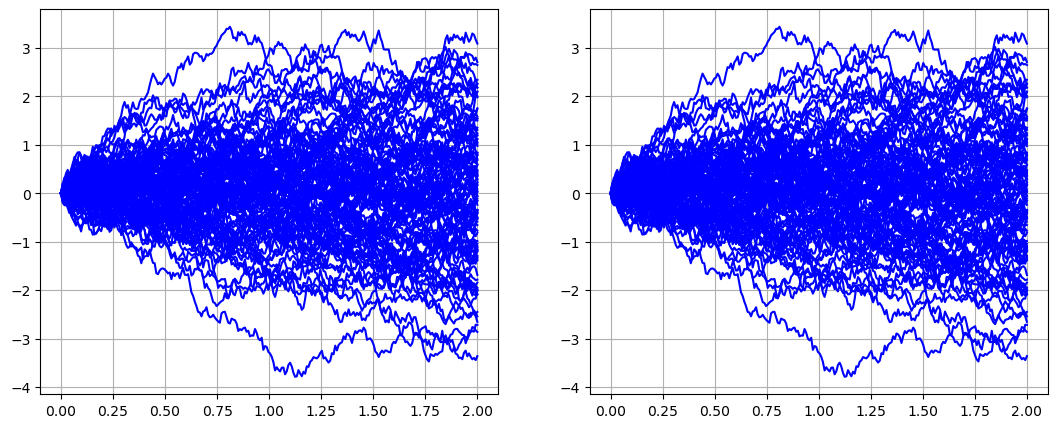

In [39]:
W = diffusion.brownian_motion()
W_sde = diffusion.diffusion_process_euler(
    dim=3,
    drift=lambda t, x: np.zeros_like(x),
    vol=lambda t, x: np.eye(n_dims)
)

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

for i in range(n_simulation):
    ax[0].plot(t_grid, W[i, 0], c='b')
    ax[0].grid('on')
    ax[1].plot(t_grid, W_sde[i, 0], c='b')
    ax[1].grid('on')
np.max(np.abs(W - W_sde))

## Ornstein-Uhlenbeck

In [29]:
lam = 10
sigma = 2
m = 3

OU_sde = diffusion.diffusion_process_euler(
    init_val=10,
    dim=1,
    drift=lambda t, x: -lam * (x - m),
    vol=lambda t, x: sigma * np.ones_like(x),
    dims=(0,),
    squeeze=True
)

Check the limit variance

In [30]:
sigma**2 / 2 / lam, OU_sde[:, -1].var()

(0.2, 0.21130390713471403)

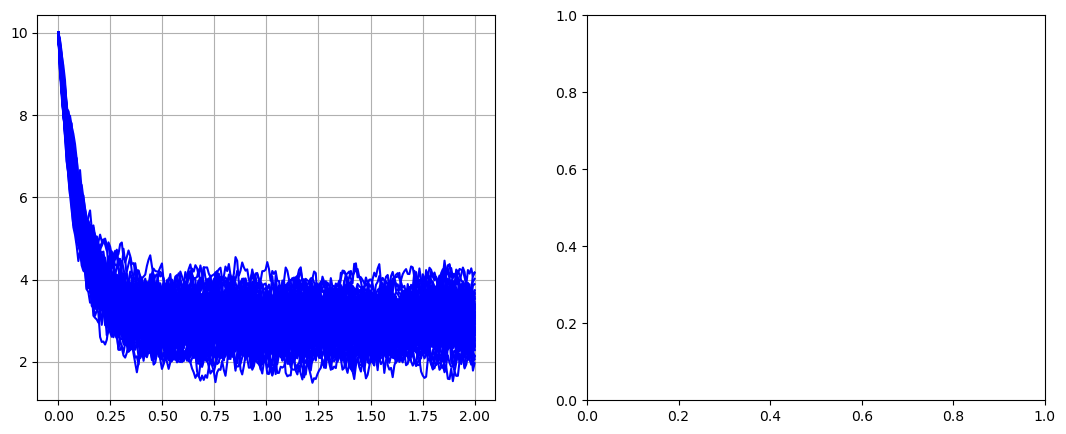

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

for i in range(n_simulation):
    ax[0].plot(t_grid, OU_sde[i], c='b')
    ax[0].grid('on')
    # ax[1] compare with exact simulation

## Geometric Brownian Motion

Let $X_t$ be a solution of an SDE
$$
dX_t = \mu X_t dt + \sigma X_t dW_t.
$$

In [45]:
T = 2
t_grid_size = 2500
t_grid = np.linspace(0, T, t_grid_size)

n_simulation = 10
n_dims = 1

rng = np.random.default_rng(seed=42)

diffusion = Diffusion(
    t_grid=t_grid,
    size=n_simulation,
    dim=n_dims,
    rng=rng
)

In [46]:
mu = 0.5
sigma = 0.2

In [47]:
gbm = diffusion.geometric_brownian_motion(
    drift=mu,
    vol=sigma,
    squeeze=True
)

gbm_sde = diffusion.diffusion_process_euler(
    dim=1,
    init_val=1,
    drift=lambda t,x: mu * x,
    vol = lambda t,x: sigma * x,
    squeeze=True
)

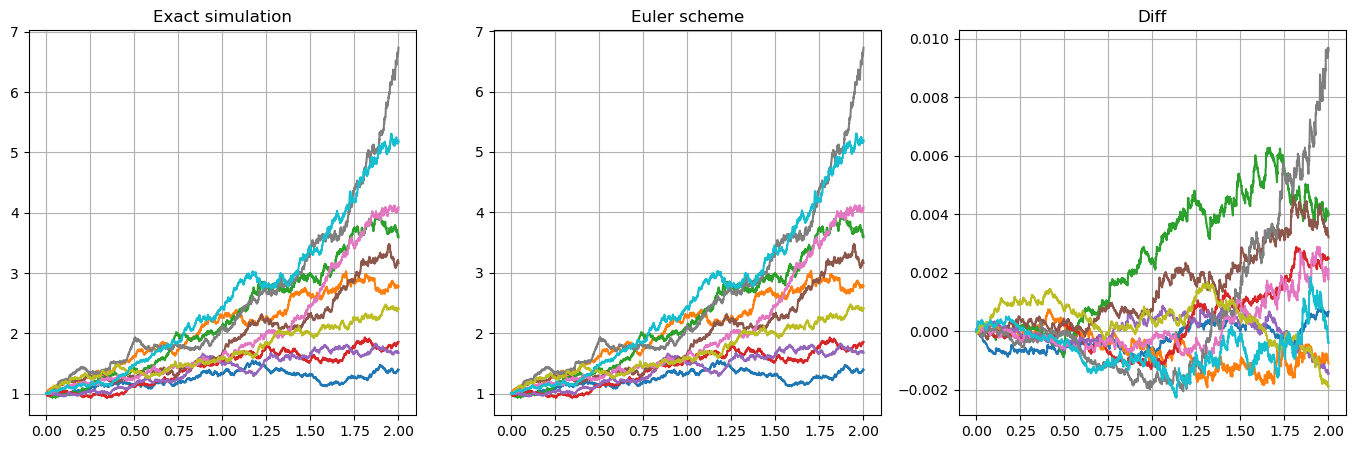

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

for i in range(n_simulation):
    ax[0].plot(t_grid, gbm[i])
    ax[0].grid('on')
    ax[0].set_title('Exact simulation')
    ax[1].plot(t_grid, gbm_sde[i])
    ax[1].grid('on')
    ax[1].set_title('Euler scheme')
    ax[2].plot(t_grid, gbm[i] - gbm_sde[i])
    ax[2].grid('on')
    ax[2].set_title('Diff')

## Local martingale which is not a martingale

Let $W_t = (W_t^1, W_t^2, W_t^3)$ be a 3-dimensional Brownian Motion issued from $(1, 0, 0)$.

It can be shown that the process
$$
M_t = \dfrac{1}{\|W_t\|}, t \geq 0
$$
is a u.i. local martingale which is not a true martingale.



In [18]:
T = 10
t_grid_size = 2500
t_grid = np.linspace(0, T, t_grid_size)

n_simulation = 100
n_dims = 3

rng = np.random.default_rng(seed=42)

diffusion = Diffusion(
    t_grid=t_grid,
    size=n_simulation,
    dim=3,
    rng=rng
)

In [19]:
W = diffusion.brownian_motion(init_val=np.array([1, 0, 0]))
M = 1 / np.sqrt(np.sum(W**2, axis=1))

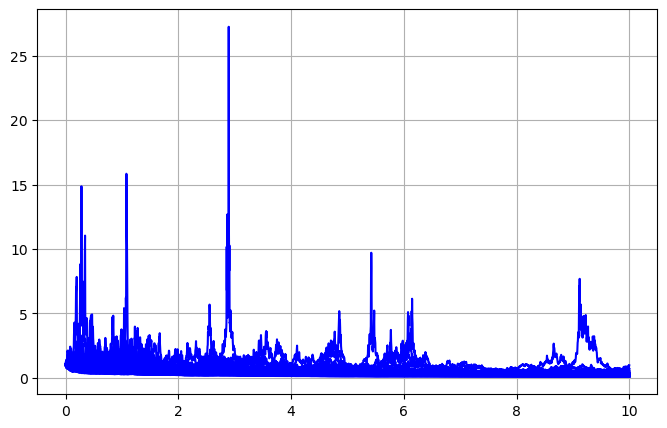

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(n_simulation):
    ax.plot(t_grid, M[i], c='b')
    ax.grid('on')